# Tipping waiters for serving food

## Import Data and Check for Null Values, Column Info, and Descriptive Statistics

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'tips.csv'
df = pd.read_csv(file_path)

null_values = df.isnull().sum()

column_info = df.info()

descriptive_stats = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Tips according to: total bill paid, number of people at a table, and the day of the week

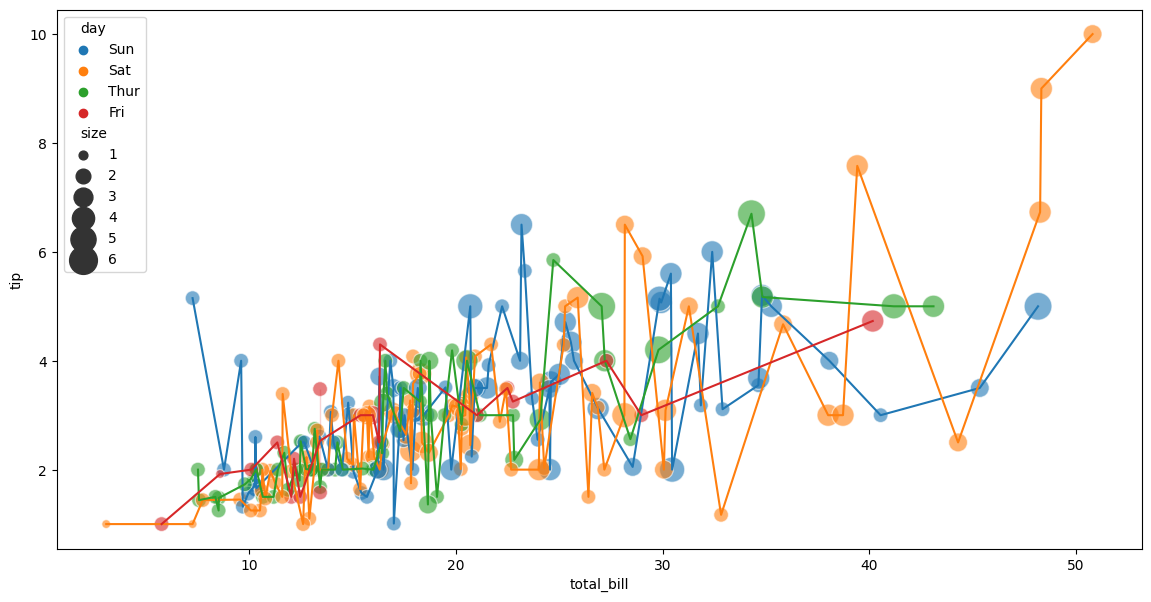

In [21]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='total_bill', y='tip', hue='day', size='size', sizes=(40, 400), alpha=0.6, data=df)
sns.lineplot(x='total_bill', y='tip', hue='day', data=df, legend=False)

plt.show()

## Tips according to: total bill paid, number of people at a table, and the gender of the person paying the bill

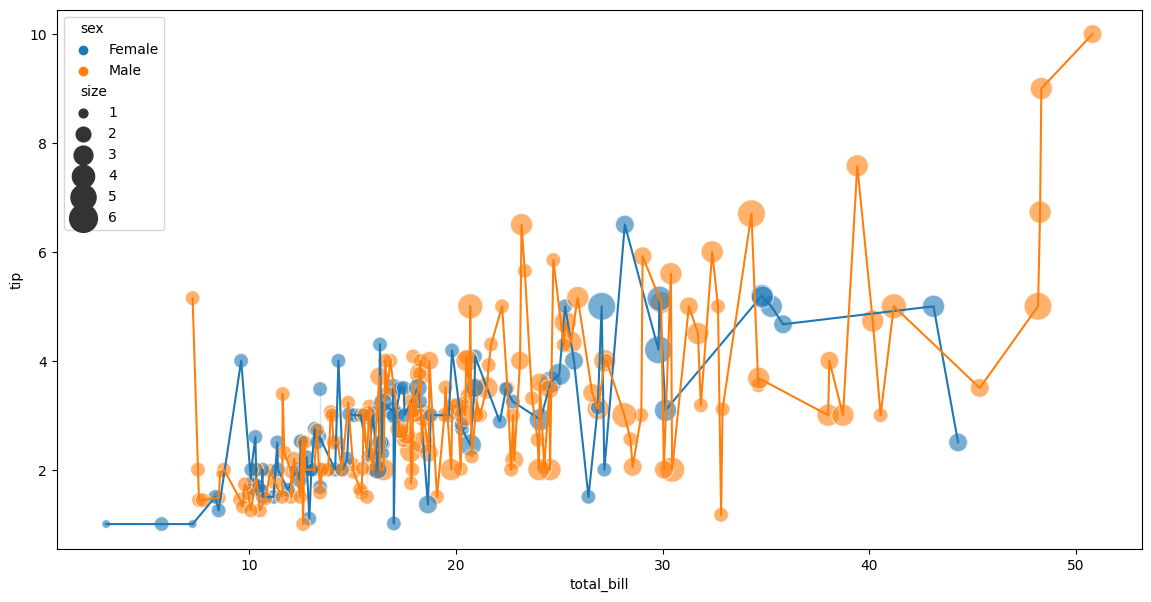

In [22]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='total_bill', y='tip', hue='sex', size='size', sizes=(40, 400), alpha=0.6, data=df)
sns.lineplot(x='total_bill', y='tip', hue='sex', data=df, legend=False)

plt.show()

## Tips according to: total bill paid, number of people at a table, and the time of the meal

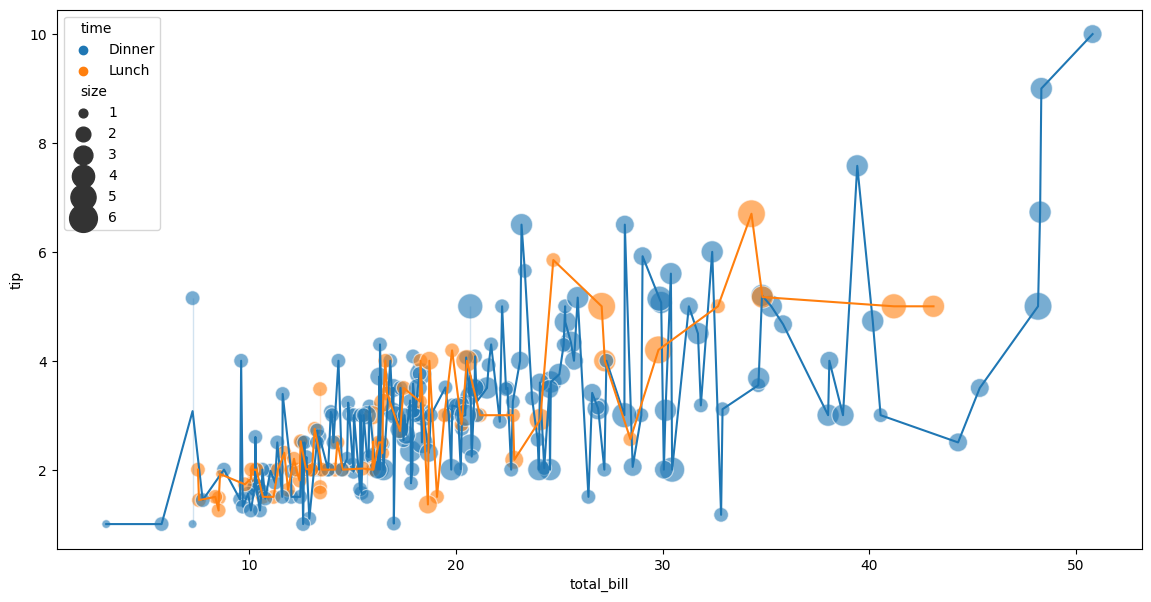

In [23]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='total_bill', y='tip', hue='time', size='size', sizes=(40, 400), alpha=0.6, data=df)
sns.lineplot(x='total_bill', y='tip', hue='time', data=df, legend=False)

plt.show()


## Tips according to the days to find out which day the most tips are given to the waiters

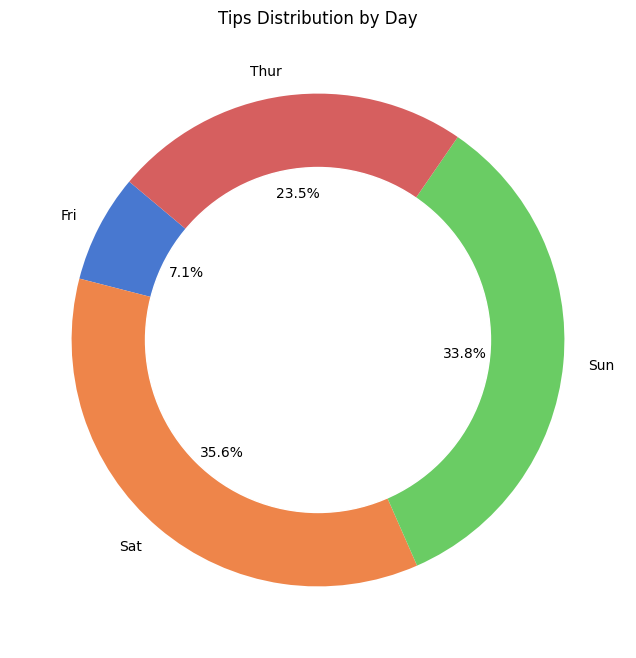

In [24]:
tips_by_day = df.groupby('day')['tip'].sum()

plt.figure(figsize=(8, 8))
colors = sns.color_palette('muted')
plt.pie(tips_by_day, labels=tips_by_day.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width': 0.4})

# Add a circle at the center to create a donut-like appearance
centre_circle = plt.Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(centre_circle)

plt.title('Tips Distribution by Day')
plt.show()

## Number of tips given to waiters by gender of the person paying the bill to see who tips waiters the most

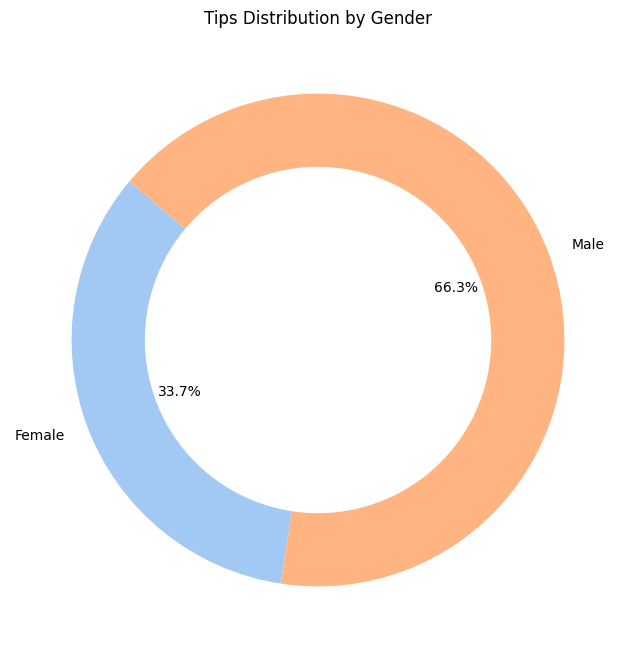

In [25]:
tips_by_gender = df.groupby('sex')['tip'].sum()

plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
plt.pie(tips_by_gender, labels=tips_by_gender.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width': 0.4})

centre_circle = plt.Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(centre_circle)

plt.title('Tips Distribution by Gender')
plt.show()

## Smoker tips more or a non-smoker

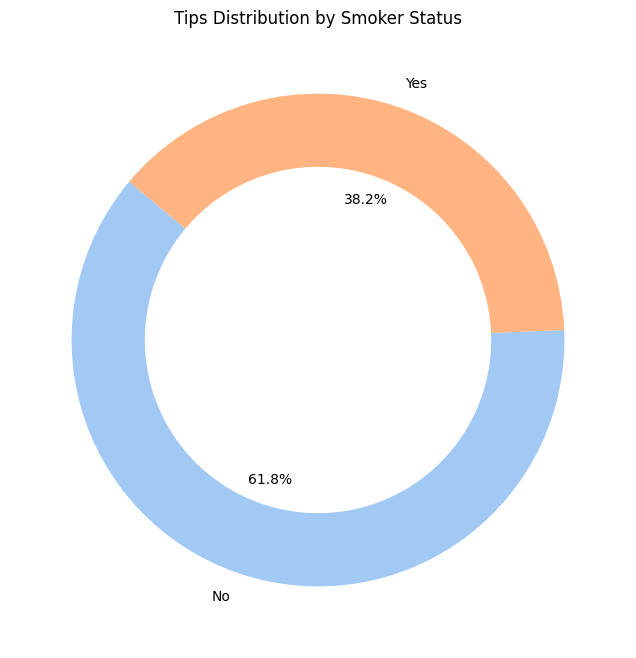

In [26]:
tips_by_smoker = df.groupby('smoker')['tip'].sum()

plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
plt.pie(tips_by_smoker, labels=tips_by_smoker.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width': 0.4})

centre_circle = plt.Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(centre_circle)

plt.title('Tips Distribution by Smoker Status')
plt.show()

## Tips are given during lunch or dinner:

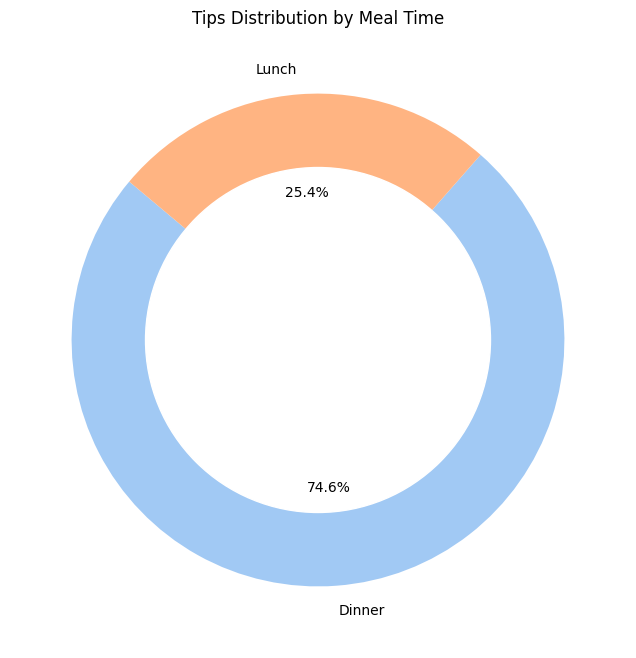

In [27]:
# Group by time of meal and sum the tips
tips_by_time = df.groupby('time')['tip'].sum()

# Plot a donut chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
plt.pie(tips_by_time, labels=tips_by_time.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width': 0.4})

# Add a circle at the center to create a donut-like appearance
centre_circle = plt.Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(centre_circle)

plt.title('Tips Distribution by Meal Time')
plt.show()

## Transform the categorical values into numerical values.

In [28]:
# Before tranformation
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [29]:
sex_mapping = {'Female': 0, 'Male': 1}
smoker_mapping = {'No': 0, 'Yes': 1}
day_mapping = {'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3}
time_mapping = {'Lunch': 0, 'Dinner': 1}

df['sex'] = df['sex'].map(sex_mapping)
df['smoker'] = df['smoker'].map(smoker_mapping)
df['day'] = df['day'].map(day_mapping)
df['time'] = df['time'].map(time_mapping)

print(df.head())

   total_bill   tip  sex  smoker  day  time  size
0       16.99  1.01    0       0    3     1     2
1       10.34  1.66    1       0    3     1     3
2       21.01  3.50    1       0    3     1     3
3       23.68  3.31    1       0    3     1     2
4       24.59  3.61    0       0    3     1     4


## Split the data into training and test sets. Then train a machine learning model.


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('tip', axis=1)
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.6963090766605349
R-squared: 0.4429399687489898


* **'mean_squared_error'**: Calculates the Mean Squared Error, which measures the average squared difference between the actual and predicted values.
* **'r2_score'**: Calculates the R-squared value, which indicates how well the model explains the variance in the target variable.

## Checking your model prediction

In [45]:

input_features = np.array([[24.50, 1, 0, 0, 1, 4]])
predicted_tip = model.predict(input_features)

print(f"Predicted Tip: {predicted_tip}")

Predicted Tip: [3.73742609]


C:\Users\92310\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
